# Pubg Finish Placement Prediction
![](https://cdn.akamai.steamstatic.com/steam/apps/578080/header.jpg?t=1673331963)

In [ ]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
jovian.commit(project='pubg-finish-placement-prediction', privacy='secret')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Let's install some required libraries.

In [ ]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [ ]:
!pip install pandas numpy matplotlib seaborn --quiet
%matplotlib inline

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library.

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [ ]:
od.download('https://www.kaggle.com/competitions/pubg-finish-placement-prediction/')

Skipping, found downloaded files in "./pubg-finish-placement-prediction" (use force=True to force download)


In [ ]:
os.listdir('pubg-finish-placement-prediction')

['test_V2.csv', 'sample_submission_V2.csv', 'train_V2.csv']

In [ ]:
train = pd.read_csv('pubg-finish-placement-prediction/train_V2.csv')

In [ ]:
test = pd.read_csv('pubg-finish-placement-prediction/test_V2.csv')
submission = pd.read_csv('pubg-finish-placement-prediction/sample_submission_V2.csv')

In [ ]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,4,2,69.27,1292,squad-fpp,22,20,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,0,0,0.00,1301,squad-fpp,27,26,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,1,1,25.38,1314,squad-fpp,29,29,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,1,1,67.89,1333,duo-fpp,49,48,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
submission

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

- **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **numGroups** - Number of groups we have data for in the match.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

**Reducing Dataset Memory**

As it is a big dataset, memory usage with int64 and float64 data types will take more space and computational power so we will reduce this.

In [ ]:
for column_name in train:
    if train[column_name].dtype=='float64':
        train[column_name] = pd.to_numeric(train[column_name], downcast= 'float')
    if train[column_name].dtype=='int64':
        train[column_name] = pd.to_numeric(train[column_name],downcast='integer')

Now let's check for null values.

In [ ]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

Only 1 record has null value in winPlacePerc so we will drop that record.

In [ ]:
train.dropna(inplace=True)

Now let us check if the values in Id, groupId and matchId are unique or if they have correlation otherwise they will be dropped before moving further.

In [ ]:
train['Id'].count()

4446965

In [ ]:
train['groupId'].count()

4446965

In [ ]:
train['matchId'].count()

4446965

It seems these are all random objects in these columns in form of Id so they should be dropped.

In [ ]:
train.drop(['Id'], axis=1, inplace=True)
train.drop(['groupId'], axis=1, inplace=True)
train.drop(['matchId'], axis=1, inplace=True)

**Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


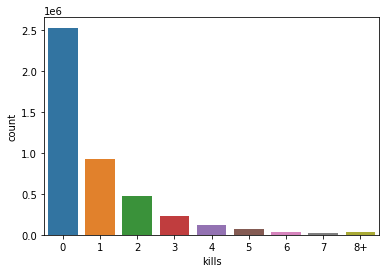

In [ ]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
sns.countplot(data['kills'].astype('str').sort_values())

The graph clearly indicates that most players die with 0 kills and very few reach around 7-8 or more kills.

**Distance in the game**

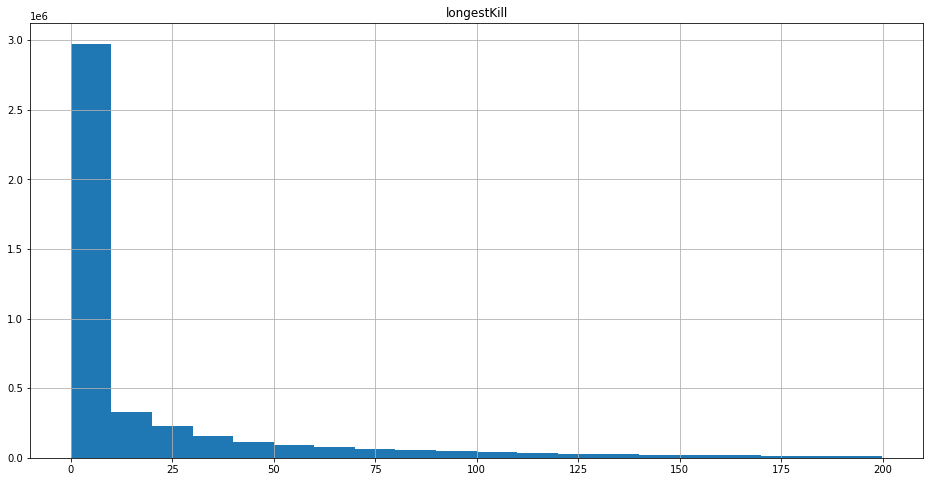

In [ ]:
dist = train[train['longestKill']<200]
dist.hist('longestKill', bins=20, figsize = (16,8))
plt.show()

Distribution of number of kills
Max number of kills: 53
95% percentile: 3.0
99% percentile: 5.0
0.6237% players killed noone


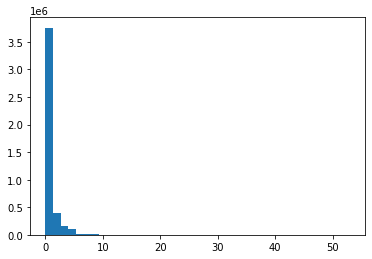

In [ ]:
import numpy as np
print('Distribution of number of kills')
print('Max number of kills:', train['DBNOs'].max())
print('95% percentile:', np.percentile(train['DBNOs'], 95))
print('99% percentile:', np.percentile(train['DBNOs'], 99))
print('{0:.4f}% players killed noone'.format((train['DBNOs'] == 0).sum()/ train.shape[0]))
plt.hist(train['DBNOs'], bins=40);

Correlation Map

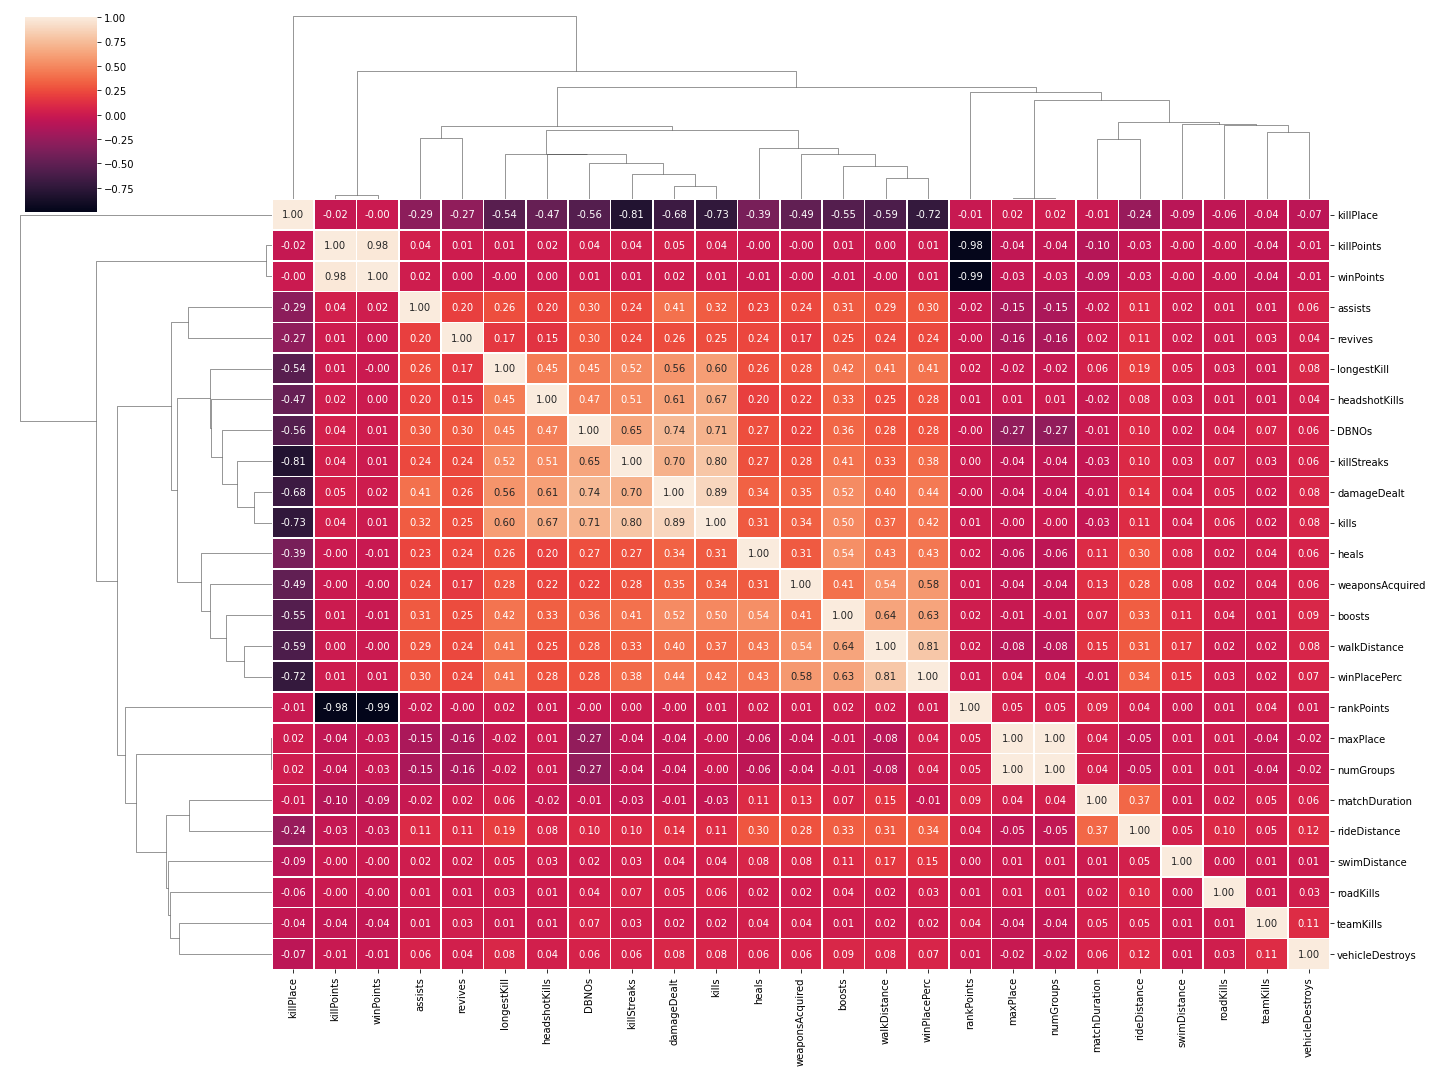

In [ ]:
ax = sns.clustermap(train.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

**Creating Train and validation set and feature importance**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

X = train.drop(["matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

col_names = X.columns

transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [ ]:
X = pd.DataFrame(X, columns=col_names)

**Model 1:Baseline XGBoost**

In [ ]:
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Let's split the training and validation set.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_val = xgb.DMatrix(X_val, label=Y_val)

We will use three hyperparameters to train this model.

In [ ]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 30  # The number of training iterations
model = xgb.train(param, D_train, steps)

Now lets check validation accuracy

In [ ]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_val)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_val, best_preds)))

MSE = 0.31813004283858387


**Model 2: Decision tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

We will directly tune some hyperparameters like n_estimators, max_features etc. for this model

In [ ]:
model2 = DecisionTreeRegressor(min_samples_leaf=3, max_features=0.5,
                          random_state=42, max_leaf_nodes=500)

In [ ]:
model2.fit(X_train, Y_train)

DecisionTreeRegressor(max_features=0.5, max_leaf_nodes=500, min_samples_leaf=3,
                      random_state=42)

Now Let us check accuracy

In [ ]:
preds2 = model2.predict(X_val)
best_preds2 = np.asarray([np.argmax(line) for line in preds])

print("MSE = {}".format(mean_squared_error(Y_val, best_preds2)))

MSE = 0.31813004283858387


The first model has MSE of 0.3181 and the second model has MSE of 0.3181 too on the validation test.
Both are giving similar results.

**Summary**

First the dataset was downloaded from kaggle and all the required libraries were installed.


*   Then dataset size was reduced by converting int64 and float64 to integer and float respectively.
*   After that, we check for null values and drop unnecessary columns.
*   Then , we perform some EDA.
*   After that, two models are trained 



**Future Work**


*   Other Models can be used with different hyperparameters for better results.
*   The model can be used on different test set `to check its performance.
*   Work can be published online



**References**


*   Jovian.com
*   Data Fields taken from - https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data
*   Different Colab Notebooks from the above competition:
  * https://www.kaggle.com/code/deffro/eda-is-fun
  * https://www.kaggle.com/code/datark1/pubg-detailed-eda-top-10-players-and-xgb-model
  * https://www.kaggle.com/code/artgor/basic-eda
  * https://www.kaggle.com/code/eryash15/pubg-simplest-model



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
